In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import sys

In [15]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/OddSemester2024/MiniProject/Tree Model Productivity'
    DATA_DIR = DIR + '/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


In [16]:
FILE = DATA_DIR + 'garments_worker_productivity.csv'
df = pd.read_csv(FILE)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [18]:
print(df["date"].head(2))
print(df["date"].tail(2))

0    1/1/2015
1    1/1/2015
Name: date, dtype: object
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object


In [19]:
df = df.drop(["date", "quarter"], axis=1)

In [20]:
df["department"].value_counts()

,count
department,
sweing,691
finishing,257
finishing,249


In [21]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [22]:
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df["department"].value_counts()

,count
department,
sweing,691
finishing,506


In [23]:
df["day"].value_counts()

,count
day,
Wednesday,208
Sunday,203
Tuesday,201
Thursday,199
Monday,199
Saturday,187


In [24]:
col_trans = make_column_transformer((OneHotEncoder(), ["department","day"]), remainder = "passthrough", verbose_feature_names_out = False)
onehot_df = col_trans.fit_transform(df)
df = pd.DataFrame(onehot_df, columns = col_trans.get_feature_names_out())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department_finishing   1197 non-null   float64
 1   department_sweing      1197 non-null   float64
 2   day_Monday             1197 non-null   float64
 3   day_Saturday           1197 non-null   float64
 4   day_Sunday             1197 non-null   float64
 5   day_Thursday           1197 non-null   float64
 6   day_Tuesday            1197 non-null   float64
 7   day_Wednesday          1197 non-null   float64
 8   team                   1197 non-null   float64
 9   targeted_productivity  1197 non-null   float64
 10  smv                    1197 non-null   float64
 11  wip                    691 non-null    float64
 12  over_time              1197 non-null   float64
 13  incentive              1197 non-null   float64
 14  idle_time              1197 non-null   float64
 15  idle

In [25]:
df.iloc[:,8:].describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [26]:
df = df.drop(["wip", "idle_time", "idle_men", "no_of_style_change"], axis=1)

In [27]:
col_trans = make_column_transformer((OneHotEncoder(), ["team"]), remainder = "passthrough", verbose_feature_names_out = False)
onehot_df = col_trans.fit_transform(df)
df = pd.DataFrame(onehot_df, columns = col_trans.get_feature_names_out())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team_1.0               1197 non-null   float64
 1   team_2.0               1197 non-null   float64
 2   team_3.0               1197 non-null   float64
 3   team_4.0               1197 non-null   float64
 4   team_5.0               1197 non-null   float64
 5   team_6.0               1197 non-null   float64
 6   team_7.0               1197 non-null   float64
 7   team_8.0               1197 non-null   float64
 8   team_9.0               1197 non-null   float64
 9   team_10.0              1197 non-null   float64
 10  team_11.0              1197 non-null   float64
 11  team_12.0              1197 non-null   float64
 12  department_finishing   1197 non-null   float64
 13  department_sweing      1197 non-null   float64
 14  day_Monday             1197 non-null   float64
 15  day_

In [28]:
df["target"] = df["actual_productivity"] / df["targeted_productivity"]
df["target"] = df["target"].apply(lambda x: 1 if x >= 1 else 0)
df["target"].value_counts()

,count
target,
1,875
0,322


In [29]:
X = df.drop(["target","actual_productivity"], axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 1)

classification_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 1)

classification_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

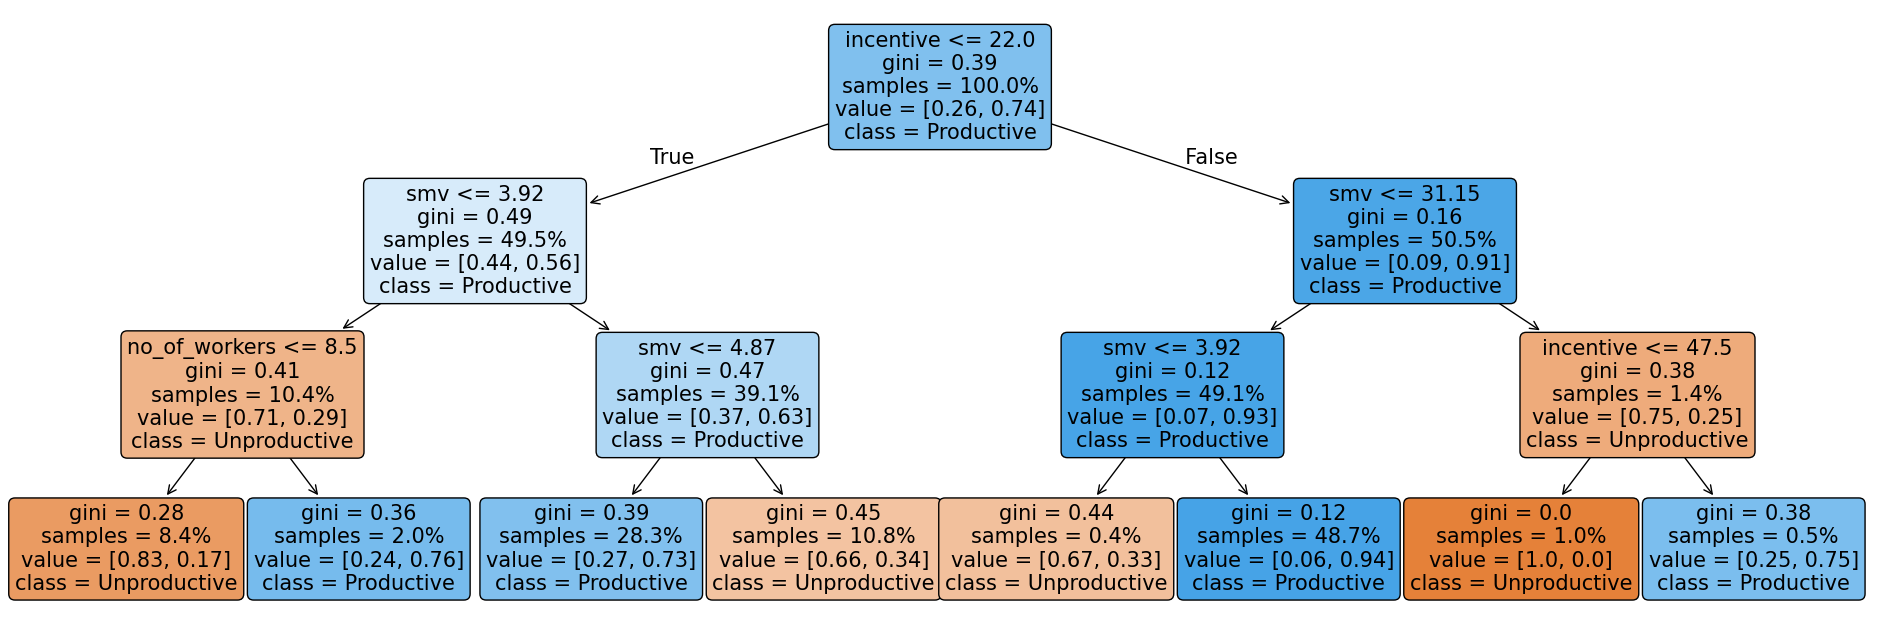

In [30]:
plt.rcParams["figure.figsize"] = [24.0, 8.0]

plot_tree(classification_tree,
 feature_names = X_test.columns,
 class_names = ["Unproductive", "Productive"],
 filled = True,
 proportion = True,
 precision = 2,
 rounded = True,
 fontsize = 15)

plt.show()

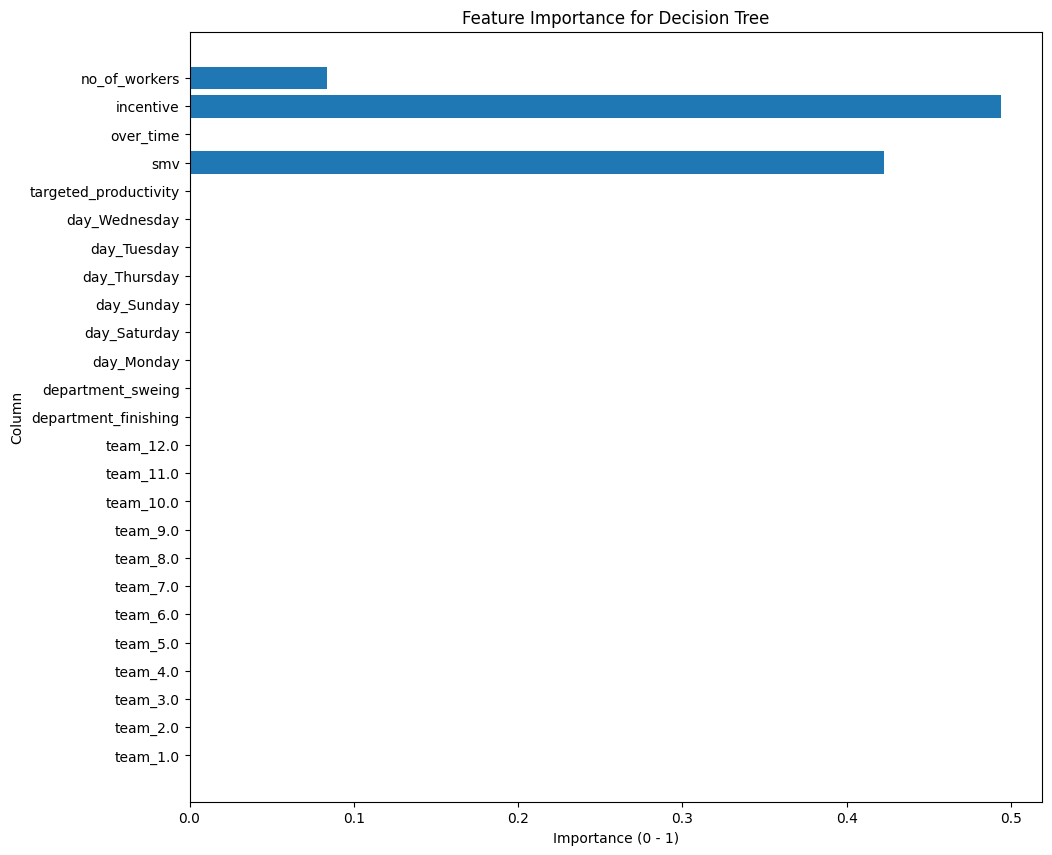

In [31]:
plt.rcParams["figure.figsize"] = [11.0, 10.0]
plt.barh(classification_tree.feature_names_in_, classification_tree.feature_importances_)
plt.xlabel("Importance (0 - 1)")
plt.ylabel("Column")
plt.title("Feature Importance for Decision Tree")
plt.show()

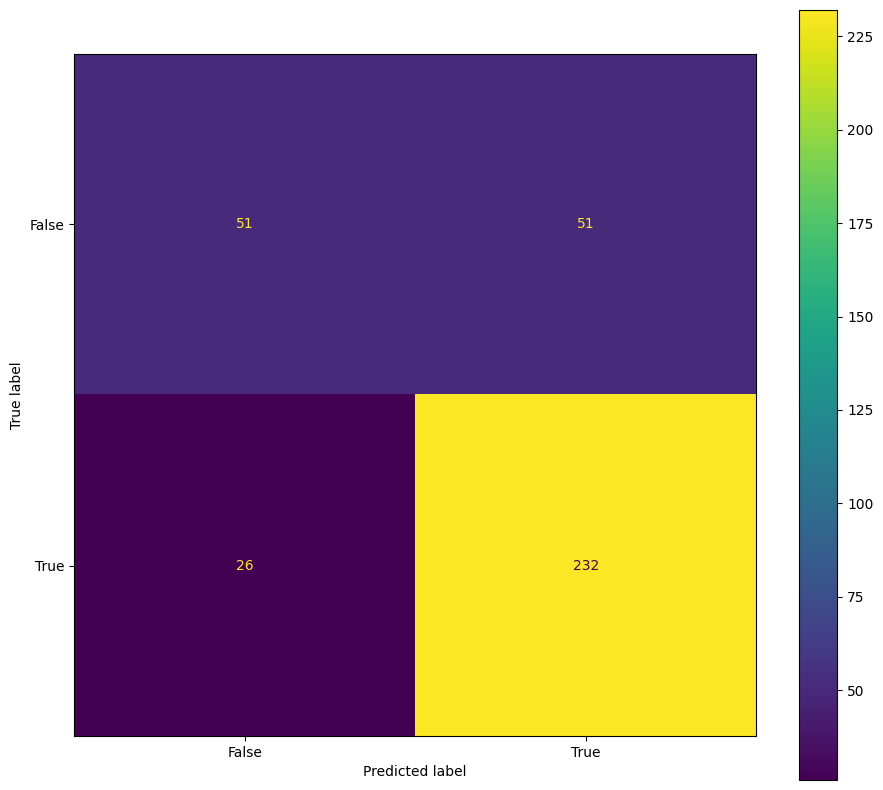

In [32]:
y_pred = classification_tree.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       102
           1       0.82      0.90      0.86       258

    accuracy                           0.79       360
   macro avg       0.74      0.70      0.71       360
weighted avg       0.78      0.79      0.78       360



In [34]:
scores = cross_val_score(classification_tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2))
print("Mean Cross Validation Score:", scores.mean().round(2))

Cross Validation Accuracy Scores: [0.82 0.86 0.82 0.84 0.85 0.8  0.72 0.74 0.82 0.77]
Mean Cross Validation Score: 0.8


In [35]:
cost_tree = DecisionTreeClassifier(random_state = 1)
cost_path = cost_tree.cost_complexity_pruning_path(X_train, y_train)

subtrees = []
for alpha in cost_path.ccp_alphas:
    subtree = DecisionTreeClassifier(random_state = 1, ccp_alpha = alpha)
    subtree.fit(X_train, y_train)
    subtrees.append(subtree)

ccp_alphas_slice = cost_path.ccp_alphas[-10:-3]
subtrees_slice = subtrees[-10:-3]
subtree_scores = [subtree.score(X_test, y_test) for subtree in subtrees_slice]
alpha_scores = tuple(zip(ccp_alphas_slice, subtree_scores))

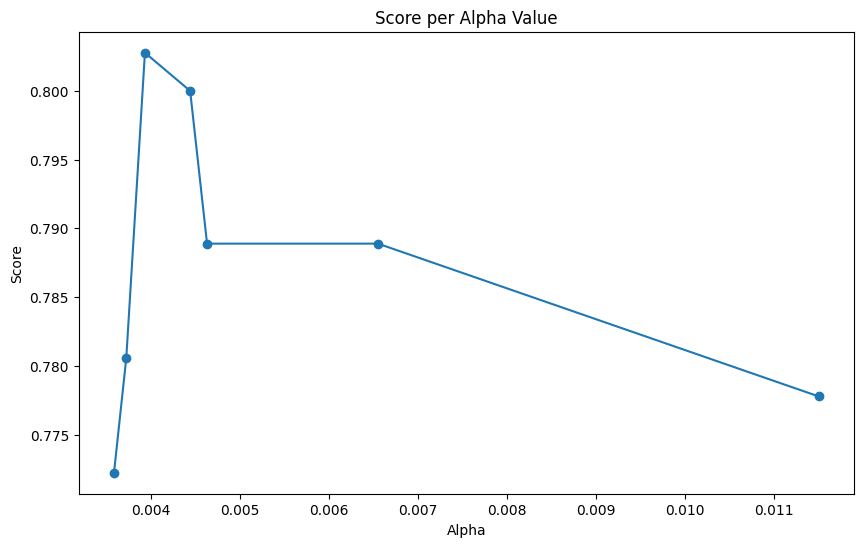

Best alpha, accuracy: (0.003931805973873159, 0.8027777777777778)


In [36]:
plt.rcParams["figure.figsize"] = [10.0, 6.0]
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Score")
ax.set_title("Score per Alpha Value")
ax.plot(ccp_alphas_slice, subtree_scores, marker="o")
plt.show()

print("Best alpha, accuracy:", max(alpha_scores, key=lambda x:x[1]))

In [37]:
forest = RandomForestClassifier(oob_score = True, random_state = 1)

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.79
